start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25


2023-04-24 16:06:35.896079: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 543s 3s/step - loss: 2.8839 - accuracy: 0.0842 - val_loss: 2.7536 - val_accuracy: 0.1172
Epoch 2/25
192/192 [==============================] - 501s 3s/step - loss: 2.2783 - accuracy: 0.2459 - val_loss: 1.9816 - val_accuracy: 0.3383
Epoch 3/25
192/192 [==============================] - 505s 3s/step - loss: 1.6984 - accuracy: 0.4397 - val_loss: 1.3337 - val_accuracy: 0.5807
Epoch 4/25
192/192 [==============================] - 497s 3s/step - loss: 1.1145 - accuracy: 0.6349 - val_loss: 0.8538 - val_accuracy: 0.7275
Epoch 5/25
192/192 [==============================] - 502s 3s/step - loss: 0.7487 - accuracy: 0.7631 - val_loss: 0.7137 - val_accuracy: 0.7615
Epoch 6/25
192/192 [==============================] - 501s 3s/step - loss: 0.5101 - accuracy: 0.8403 - val_loss: 0.4276 - val_accuracy: 0.8723
Epoch 7/25
192/192 [==============================] - 490s 3s/step - loss: 0.4085 - accuracy: 0.8725 - val_loss: 0.4258 - val_accuracy: 0.8645
Epoch 8/25

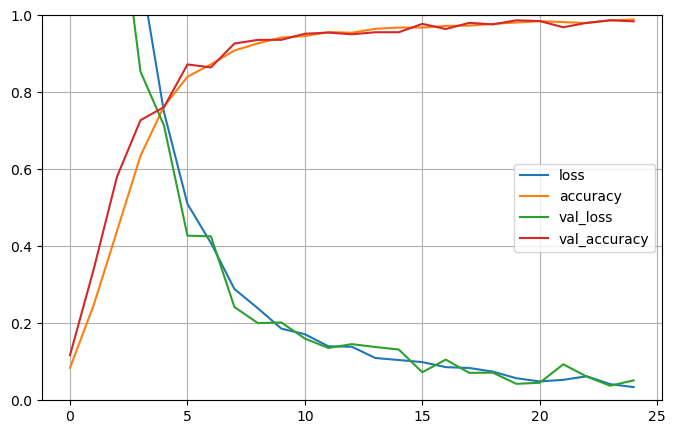

The End


In [1]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Reshape((-1, 64)))

model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh', return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation='tanh', return_sequences=True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_BiGRU_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN_BiGRU.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_BiGRU_graph.png")
plt.show()

print("The End")

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Reshape((-1, 64)))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh', return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, activation='tanh', return_sequences=True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_BiLSTM_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN_BiLSTM.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_BiLSTM_graph.png")
plt.show()

print("The End")

start
Defining Data generator
Found 12227 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Found 4880 images belonging to 20 classes.
Defining Model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
 11/192 [>.............................] - ETA: 12:13 - loss: 3.0064 - accuracy: 0.0483

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Defining Data generator")

datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.4)
train_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=64)

valid_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                           target_size=(150, 150), 
                                           batch_size=32, subset='validation')

test_dataset = datagen.flow_from_directory('/kaggle/input/mel-spectrograms/Mel Spectrograms', 
                                          target_size=(150, 150), 
                                          batch_size=32, 
                                          subset='validation')

print("Defining Model")

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                              kernel_size=(3,3), 
                              activation='relu', 
                              strides=(1,1), 
                              input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-3), metrics=['accuracy'])

print("Model Fitting")

checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_Model.h5', save_best_only=True)

history = model.fit_generator(train_dataset, epochs=25, validation_data=valid_dataset, callbacks = [checkpoint_cb])

print(model.evaluate(test_dataset))
#model.save("CNN_model.h5")

print("Plotting Graph")

df_hist = pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (8,5))
df_hist.to_csv('History_CNN.csv')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig("CNN_graph.png")
plt.show()

print("The End")

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.GRU(512, activation='tanh', return_sequences=True), input_shape=(1000, 64)))
model.add(keras.layers.Bidirectional(keras.layers.GRU(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.GRU(128, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('BiGRU_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("BiGRU_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('BiGRU_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.Bidirectiornal(keras.layers.LSTM(512, activation='tanh', return_sequences=True), input_shape=(1000, 64)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(256, activation='tanh', return_sequences = True)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, activation='tanh')))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('BiLSTM_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("BiLSTM_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('BiLSTM_graph.png')
plt.show()

print('The End')

In [ ]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

df = pd.read_csv("/kaggle/input/eeg-biometric-competition/Enrollment_Info.csv")

y = []
for subid in df['subject']:
    if subid == 'sub021':
        break
    y.append(subid)
y = np.array(pd.get_dummies(y))
print(y.shape, y)

x = []

for epochid in df['EpochID']:
    if epochid == 'epoch012228':
        break
    annots = loadmat('/kaggle/input/eeg-biometric-competition/Enrollment/'+epochid+'.mat')
    wave = annots['epoch_data']
    wave = np.array(wave[:-1])
    x.append(wave.T)

x = np.array(x)

print('X shape=',x.shape, 'Y shape=', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.GRU(128, activation='tanh', return_sequences=True, input_shape=(1000, 64)))
model.add(keras.layers.GRU(512, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(256, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(64, activation='tanh'))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('GRU_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_split=(x_test, y_test), callbacks=[checkpoint_cb])

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("GRU_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('GRU_graph.png')
plt.show()

print('The End')

In [17]:
print('start')

import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

print('File Loading')

classes = {'sub001':1216, 'sub002':1218, 'sub003':1218, 'sub004':1218, 'sub005':1218, 
           'sub006':1218, 'sub007':1214, 'sub008':1218, 'sub009':1218, 'sub010':1218}

y = []
x = []

for subid in classes.keys():
    print(subid)
    for i in range(1, classes[subid]+1):
        annots = loadmat('Waves/'+subid+'/'+subid+'_'+str(i)+'.mat')
        wave = annots['wave']
        wave = np.array(wave[:-1])
        x.append(wave.T)
        y.append(subid)

# print('X shape=',x.shape, 'Y shape=', y.shape)

start
File Loading
sub001
sub002
sub003
sub004
sub005
sub006
sub007
sub008
sub009
sub010


In [21]:
y = np.array(pd.get_dummies(y))
y.shape

(12174, 10)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43, stratify=y)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print('Model Training')

model = keras.models.Sequential()
model.add(keras.layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(1000, 64)))
model.add(keras.layers.LSTM(128, activation='tanh', return_sequences = True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(64, activation='tanh'))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('LSTM_Model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[checkpoint_cb])
model.save("LSTM_model.h5")

print('Plotting Model Graph')

df_hist = pd.DataFrame(history.history)
df_hist.to_csv("LSTM_History.csv")
df_hist.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('LSTM_graph.png')
plt.show()

print('The End')

Model Training
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1000, 128)         98816     
                                                                 
 lstm_10 (LSTM)              (None, 1000, 128)         131584    
                                                                 
 dropout_3 (Dropout)         (None, 1000, 128)         0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 20)                1300      
                                                                 
Total params: 285,268
Trainable params:

ValueError: Data cardinality is ambiguous:
  x sizes: 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 65, 65, 65, 65, 1000, 65, 1000, 65, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 65, 1000, 1000, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 65, 65, 1000, 65, 65, 65, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 65, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 1000, 65, 1000, 1000, 65, 1000, 65, 1000, 65, 65, 1000, 65, 65, 1000, 65, 65, 65, 1000, 65, 1000, 1000, 65, 65, 65, 65, 1000, 1000, 65, 1000, 1000, 65, 65, 65, 1000, 1000, 1000, 1000, 65, 65, 65, 1000, 65, 65, 1000, 1000, 65, 65, 1000, 1000
  y sizes: 9739
Make sure all arrays contain the same number of samples.